# **Introduction to Image Analysis and Processing**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week4/05_image_analysis.ipynb)

**Note**
If you are running this jupyter notebook from Colab, then run the next cell by pressing `SHIFT+ENTER` to install the required packages for this notebook. Otherwise, skip the next cell.

In [ ]:
!pip install -q astropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from astropy.visualization import make_lupton_rgb

# To improve Aesthetics of plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

# **FITS**

Flexible Image Transport System (FITS) is an open standard defining a digital file format useful for storage, transmission and processing of data: formatted as multi-dimensional arrays (for example a 2D image), or tables.FITS is the most commonly used digital file format in astronomy.

In [3]:
hdu = fits.open('dss2ir.fits')
hdu

HDU list class.  This is the top-level FITS object.  When a FITS
file is opened, a `HDUList` object is returned.

Learn more about the object by running the cell below.

In [4]:
help(hdu)

Help on HDUList in module astropy.io.fits.hdu.hdulist object:

class HDUList(builtins.list, astropy.io.fits.verify._Verify)
 |  HDUList(hdus=[], file=None)
 |  
 |  HDU list class.  This is the top-level FITS object.  When a FITS
 |  file is opened, a `HDUList` object is returned.
 |  
 |  Method resolution order:
 |      HDUList
 |      builtins.list
 |      astropy.io.fits.verify._Verify
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, item)
 |      Returns `True` if ``item`` is an ``HDU`` _in_ ``self`` or a valid
 |      extension specification (e.g., integer extension number, extension
 |      name, or a tuple of extension name and an extension version)
 |      of a ``HDU`` in ``self``.
 |  
 |  __copy__(self)
 |      Return a shallow copy of an HDUList.
 |      
 |      Returns
 |      -------
 |      copy : `HDUList`
 |          A shallow copy of this `HDUList` object.
 |  
 |  __deepcopy__(self, memo=None)
 |  
 |  __delitem__(self, key)
 |     

Every Header Data Unit (HDU) normally has two components: header and data. In astropy these two components are accessed through the two attributes of the HDU, hdu.header and hdu.data.

 FITS image headers can contain information about one or more scientific coordinate systems that are overlaid on the image itself. Images contain an implicit Cartesian coordinate system that describes the location of each pixel in the image, but scientific uses usually require working in 'world' coordinates, for example the celestial coordinate system.

In [5]:
hdu[0].header

SIMPLE  =                    T / Written by SkyView Wed Jun 30 06:16:55 EDT 2021
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =   202.46957500000002 / Reference longitude                            
CRVAL2  =    47.19525800000001 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

In [6]:
data = hdu[0].data
type(data)

numpy.ndarray

**Exercise 1.1**

Write code to display the image data in the variable 'data'. The plot should have following features



1.   Grayscale colormap
2.   Title  : 'M 51 Galaxy'
3.   Origin : 'lower'



# **Scaling or Stretch function**

Scaling is used to change the visual appearance of an image, to alter the quantity of information stored in a scene representation, or as a low-level preprocessor in multi-stage image processing chain which operates on features of a particular scale. You choose which “stretch function” or representation to use

A logarithmic representation of the pixel values tends to suppress the bright parts of the image, i.e. the stars, and to enhance the fainter part, e.g. nebulosity. This can be desirable if the ‘faint stuff’ needs ‘a boost’, but a logarithmic stretch function can also reduce the contrast in an image, producing a lower dynamic range

Here's an example of logarithmic scaling



Text(0.5, 1.0, 'Sqrt scaled M 51 Galaxy')

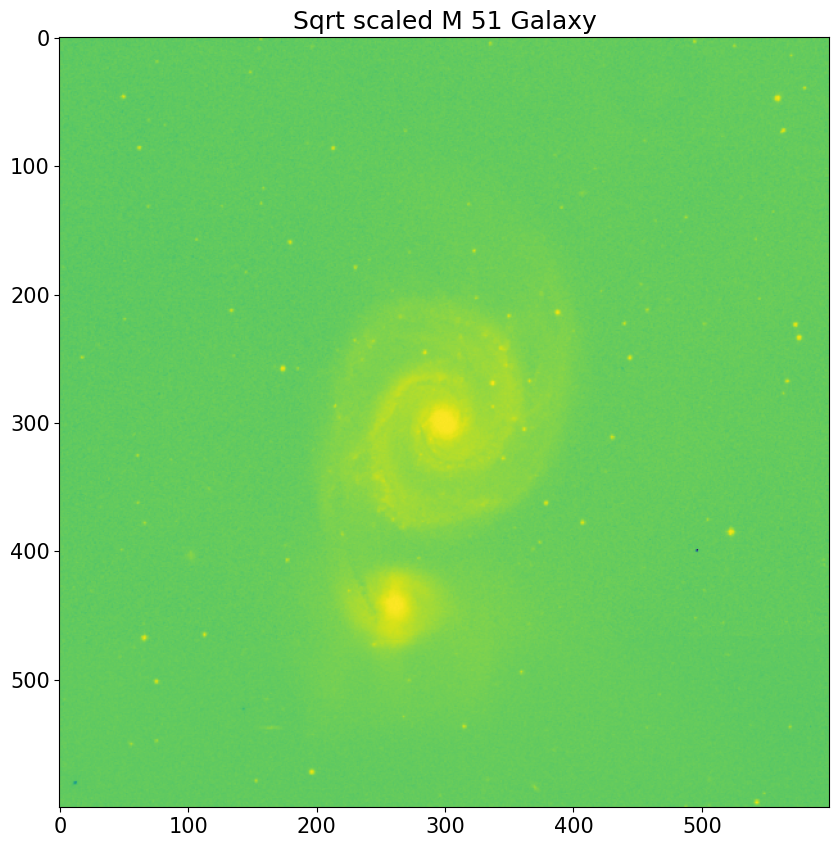

In [7]:
log = np.log10(data)
plt.imshow(log)
plt.title('Sqrt scaled M 51 Galaxy')

**Exercise 1.2.a**

Write a function which takes 2D numpy array and scaling function name as input and returns scaled image. The function should have following scaling functions

1. Linear.
2. Square root.
3. Logarithmic [Base 10]. ( Remember log 0 is indefinite, use log( 1+ data) )
4. asinh


IndentationError: expected an indented block after 'if' statement on line 10 (<ipython-input-8-64b7378516c5>, line 15)

**Exercise 1.2.b**

Write a function which takes 2D array and normalization method as input and returns normalized array. The function should have following normalization method

1. Normalize data to the range [0,1]. Hint : Use min and max [Learn more](https://en.wikipedia.org/wiki/Normalization_(statistics))
2. Normalize data using mean and standard deviation


# **RGB Composite image**

The RGB colour model relates very closely to the way we perceive colour with the r, g and b receptors in our retinas. RGB uses additive colour mixing and is the basic colour model used in television or any other medium that projects colour with light. It is the basic colour model used in computers and for web graphics.

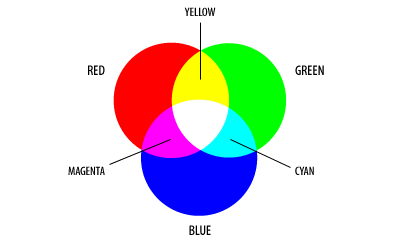


Images of astronomical objects are usually taken with electronic detectors such as a CCD (Charge Coupled Device). Similar detectors are found in normal digital cameras. Telescope images are nearly always greyscale, but nevertheless contain some colour information. An astronomical image may be taken through a colour filter. Different detectors and telescopes also usually have different sensitivities to different wavelengths.

Filters can either be broad-band (Wide) or narrow-band (Narrow). A broad-band filter lets a wide range of colours through, for instance the entire green or red area of the spectrum. A narrow-band filter typically only lets a small wavelength span through, thus effectively restricting the transmitted radiation to that coming from a given atomic transition, allowing astronomers to investigate individual atomic processes in the object.



## **Sloan Digital Sky Survey**

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. [Learn more](https://www.sdss.org/instruments/)

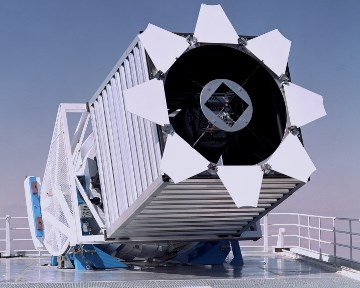

The SDSS camera has five filters, which together span the optical window. Each filter images a section of sky nearly, but not exactly, simultaneously (each filter is separated by 71.72 seconds). The filters always observe in the same time sequence: r, i, u, z and then g. A mnemonic for remembering the order is “robert is under ze gunn.”

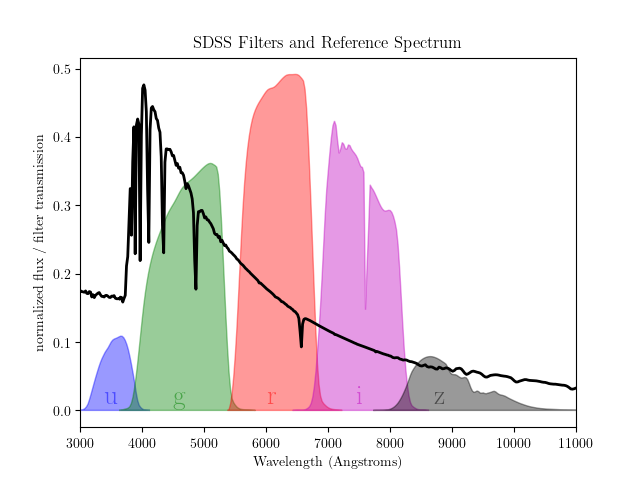

# **Skyview**

In the next exercise we will be using Skyview module from astroquery package to acquire r, g, and i filter images and use it to make RGB images. First let's install Astroquery package. ([Astroquery Documentation](https://astroquery.readthedocs.io/en/latest/))



In [10]:
!pip install astroquery --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.4 MB/s eta 0:00:00


In [11]:
from astroquery.skyview import SkyView

The SkyView service offers a cutout service for a number of imaging surveys.It is a Virtual Observatory on the Net(at skyview.gsfc.nasa.gov) generating images of any part of the sky at wavelengths in all regimes from Radio to Gamma-Ray.

In [12]:
SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [13]:
size = 400
paths = SkyView.get_images(position='M 63',radius=size*u.arcsec,pixels=512, survey=['SDSSg','SDSSr','SDSSi'])

HTTPError: HTTP Error 404: Not Found

Here position = 'M 63' refers to the name of the source. M 63 stands for 63rd source in the [Messier Catalog](https://en.wikipedia.org/wiki/Messier_object). For specifying a source in the sky you can either use their catalog names, for example : M 51, NGC 3690, manga 8515-1901 etc or use RA and Dec of the source. RA and Dec are coordinates of the [Equatorial Coordinate system](https://en.wikipedia.org/wiki/Equatorial_coordinate_system) similar to latitude and longitude geographical coordinate system.

radius = size*u.arcsec gives angular size of the source in arc seconds.

pixels = 512 sets the number of pixels in the output image.

survey = ['SDSSg','SDSSr','SDSSi'] returns data for g,r and i band of SDSS

We notice that SkyView.get_images returns a HDUList object

In [ ]:
paths[0][0].header # First object in the list

**Exercise 1.3**

Write code to store the g, r, and i filter data in variable B, G, and R respectively. It's convention to assign shortest wavelength to blue and longest wavelength to red.

In [ ]:
R = paths[2][0].data  # Example
G =
B =

**Exercise 1.4.a**

Write code for applying following operations on filter data

Step 1. linear scale

Step 2. Normalize to [0,1]

For each filter data and stack the 3 filters to create a 3D array of shape ( 512,512,3). Hint : Use np.stack

In [ ]:
# Use the functions you defined earlier
R_norm =
G_norm =
B_norm =
RGB    =                                 # Stacked 3D array

RGB.shape

In [ ]:
plt.imshow(RGB)

For displaying 3D array as RGB image using matplotlib, the data of each 2D filter is expected to be in the range [0,1], thus we normalized the data to [0,1]

**Exercise 1.4.b**

Step 1. arcsinh scale

Step 2. Normalize to [0,1]

For each filter data and stack the 3 filters to create a 3D array of shape ( 512,512,3 ). Hint : Use np.stack

In [ ]:
R_norm =
G_norm =
B_norm =
RGB =   # Stacked 3D array
plt.imshow(RGB)

# **RGB Image using astropy**

Astropy.visualization has a function make_lupton_rgb which returns a Red/Green/Blue color image from up to 3 images using an asinh stretch. The input images can be int or float, and in any range or bit-depth. [Learn more](https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html)

# **Puzzle I**

**Step 1**

Write code to open the FITS file named 'puzzle_1.fits and store the data in a variable (say RGB1 )and display the RGB image


**Step 2**

Write code to make RGB image  of 'SN 1054' with 'log' scaling,and radius equal to 9 arcminutes and 512 pixels using surveys 'DSS2 IR', 'DSS2 Red' and 'DSS2 Blue'. Let the RGB image be stored in a variable named RGB2

Make a new 3D array which stores the difference between RGB2 and RGB1. Plot the G band data of this new array.

In [ ]:
RGB_diff =

In [ ]:
G_diff =

Save the plot for submission and later reference

# **Saving FITS image**
Saving the final step as a fits file with name 'puzzle_1_solution.fits'

In [ ]:
hdu = fits.PrimaryHDU(G_diff)
hdul = fits.HDUList(hdu)
hdul.writeto('puzzle_1_solution.fits', overwrite = True)